# Python Code for Cropping Images Based on ARuCO Markers
## Cropped Image DOES NOT include ARuCO markers
## This code is provided by the 2024 CCBER Data Science Capstone group.

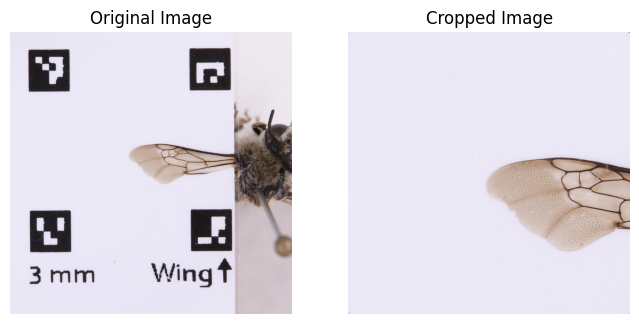

In [2]:
# First, import necessary packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define a function that detects the ARUCO markers
def detect_markers(image):
    # Load the predefined dictionary: DICT_4X4_250
    dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_250) # cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_250)
    parameters = cv2.aruco.DetectorParameters()

    # Detect the markers in the image and save the corners and ids
    marker_corners, marker_ids, _ = cv2.aruco.detectMarkers(image, dictionary, parameters=parameters)
    
    return marker_corners, marker_ids

# Define a function to find outer corners of ARUCO markers
def find_outer_corners(marker_corners):
    # Create an empty array
    outer_corners = []
    for corners in marker_corners:
        outer_corners.append(np.squeeze(corners).tolist())
    return outer_corners

# Define a function to crop an image based on the ARUCO markers that form a square
def crop_image_to_square(image, marker_corners):
    # Call the function that finds the four outer corners of ARUCO markers
    outer_corners = find_outer_corners(marker_corners)

    # Extract the coordinates of the outer corners
    corner1 = np.array(outer_corners[0][0])
    corner2 = np.array(outer_corners[1][1])
    corner3 = np.array(outer_corners[2][2])
    corner4 = np.array(outer_corners[3][3])

    # Calculate the center of the square
    center = ((corner1 + corner2 + corner3 + corner4) / 4).astype(int)

    # Calculate the side length of the square
    side_length = int(min(np.linalg.norm(corner1 - corner2), np.linalg.norm(corner2 - corner3),
                          np.linalg.norm(corner3 - corner4), np.linalg.norm(corner4 - corner1)))

    # Calculate the coordinates of the square corners
    square_corner1 = tuple(center - side_length // 2)
    square_corner2 = tuple(center + side_length // 2)

    # Crop the image to the square region
    cropped_image = image[square_corner1[1]:square_corner2[1], square_corner1[0]:square_corner2[0]]

    return cropped_image

# Load the input image: CHANGE THE IMAGE PATH FOR LOCAL TRIALS
input_image_path = "/Users/jenniferrink/Downloads/UCSB-IZC00043095_L.JPG"
image = cv2.imread(input_image_path)

# Detect ARUCO markers in the image
marker_corners, _ = detect_markers(image)

# Display the Original Image and the Cropped Image
if marker_corners and len(marker_corners) >= 4:
    cropped_image = crop_image_to_square(image, marker_corners[:4])  # Use the first 4 markers

    # Display the original image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    # Display the cropped image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.title("Cropped Image")
    plt.axis('off')

    plt.show()
else:
    print("Not enough ARUCO markers found to form a square.")